<a href="https://colab.research.google.com/github/dvircohen0/Machine-Learning-Algorithms-From-Scratch/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import keras
from keras.layers import Conv2D, Flatten, Dense, Reshape,Conv2DTranspose
from keras.layers.convolutional import Deconvolution2D
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

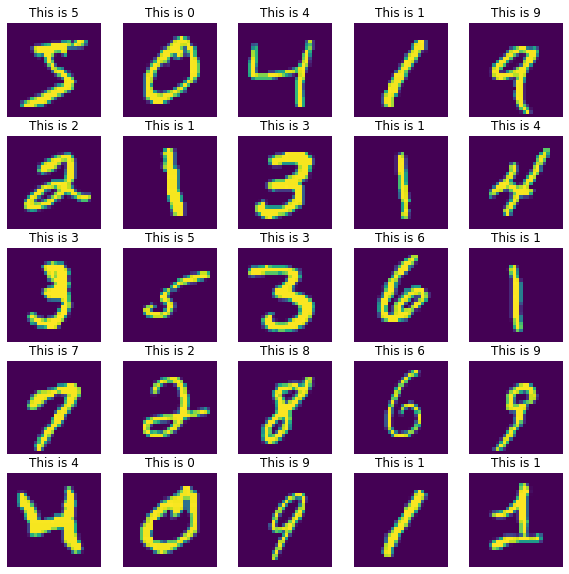

In [20]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

fig, axs = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        ax = axs[i,j]
        ax.imshow(xt[5*i+j])
        ax.axis('off')
        ax.set_title('This is '+str(yt[5*i+j]))

Convolntal Autoencoder
![picture](https://www.researchgate.net/profile/Xifeng-Guo/publication/320658590/figure/fig1/AS:614154637418504@1523437284408/The-structure-of-proposed-Convolutional-AutoEncoders-CAE-for-MNIST-In-the-middle-there.png)

In [17]:
input_shape=(28, 28, 1)
model = keras.Sequential()
x = Conv2D(32, (5, 5),strides=2 ,activation='relu', padding='same')(input_img)
x = Conv2D(64, (5, 5),strides=2 ,activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3),strides=2 ,activation='relu')(x)
x = Flatten()(x)
encoded = Dense(10)(x)

x = Dense(1152,activation='relu')(encoded)
x = Reshape((3,3,128))(x)

x = Conv2DTranspose(64,(3,3),strides=2, activation='relu',padding='valid')(x)
x = Conv2DTranspose(32,(5,5),strides=2, activation='relu',padding='same')(x)
decoded= Conv2DTranspose(1,(5,5),strides=2,padding='same')(x)

ae = keras.Model(input_img, decoded)
ae.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 32)        832       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 7, 7, 64)          51264     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_6 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                11530     
_________________________________________________________________
dense_13 (Dense)             (None, 1152)              1267

In [31]:
import datetime, os

%load_ext tensorboard
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [28]:
EarlyStopping = keras.callbacks.EarlyStopping(monitor="loss",patience=3,restore_best_weights=True)
ModelCheckpoint = keras.callbacks.ModelCheckpoint('Autoencoder.h5',monitor="loss",save_best_only=True)
TensorBoard = tf.keras.callbacks.TensorBoard(logdir)


ae.compile(optimizer='adam', loss=keras.losses.mean_squared_error,metrics=["accuracy"])
history =ae.fit(x_train, x_train ,epochs=2,callbacks=[EarlyStopping,ModelCheckpoint,TensorBoard])

Epoch 1/2
1875/1875 [==============================] - 80s 42ms/step - loss: 0.0110 - accuracy: 0.8134
Epoch 2/2
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0107 - accuracy: 0.8136


In [ ]:
%tensorboard --logdir logs

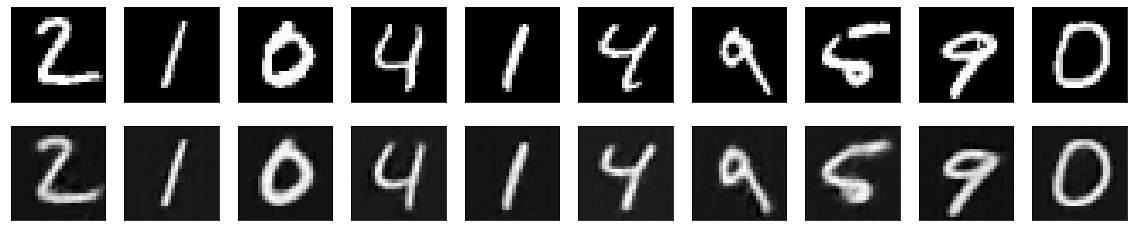

In [30]:
decoded_imgs = ae.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()